Computing convex hull using gift wrapping technique ... done ! It took  0.0002086162567138672  seconds
Computing convex hull using divide and conquer technique ... done ! It took  0.0002257823944091797  seconds


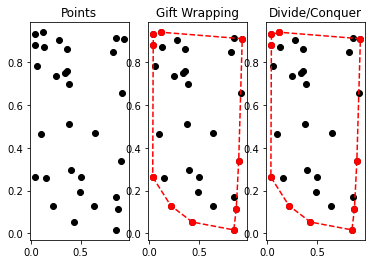

In [29]:
import matplotlib.pyplot as plt
import time
import random


# function that checks if three points a,b,c are clockwise positioned
def is_clockwise(a, b, c):
    if (c[1] - a[1]) * (b[0] - a[0]) < (b[1] - a[1]) * (c[0] - a[0]):
        return True
    else:
        return False    


# compute with naive method the convex hull of the points cloud pts
# and store it as a list of vectors
# Complexity is O(n*h), where n is the number of points in the point cloud
# and h is the number of edges of the hull, since for each edge that we are
# adding, we are iterating over n points in the point cloud. 
def convex_hull_2d_gift_wrapping(pts):
    hull = [] 
    curr = next = 0  # curr, next indexes starting point, candidate point resp. 
    while True:
        hull.append(pts[curr])  # start from leftmost point
        next = (curr + 1) % len(pts) 
        # Check if all other points are anti-clockwise 
        # to candidate point i.e. LHS of the edge from pts[curr]
        # to candidate point. If so, we add candidate point
        # to list of hull points. Otherwise, we found another
        # point on the RHS of the edge from pts[curr] to 
        # candidate point, so we update that as our new 
        # candidate point. 
        for idx, point in enumerate(pts):
            if point == pts[curr]:
                continue
            if is_clockwise(pts[curr], pts[next], point):
                next = idx

        curr = next     # to update our new starting point
        if curr == 0:   # we are back to initial point of hull - terminate.
            break

    return hull


# compute with divide and conquer method the convex hull of the points
# cloud pts and store it as a list of vectors
# By master theorem, the running time is T(n) = 2T(n/2) + O(n), 
# where f(n) is O(n) since we are merging points by iterating over 
# points in left and right hull. Hence, complexity is Big theta
# (n log n) by case 2 (k = 0).
def convex_hull_2d_divide_conquer(pts):
    # Base case
    if len(pts) <= 4:
        return convex_hull_2d_gift_wrapping(pts)

    # Partition points into left and right halves
    mid = len(pts) // 2
    L = pts[:mid]
    R = pts[mid:]
    # Recursively partition points into halves
    left_hull = convex_hull_2d_divide_conquer(L)
    right_hull = convex_hull_2d_divide_conquer(R)

    return merge(left_hull, right_hull)

# Merge routine for divide and conquer method
def merge(left_hull, right_hull):
    # Find the index of rightmost point of left hull 
    a, xmax = None, None
    for idx, point in enumerate(left_hull):
        if xmax is None:
            xmax = point[0]
            a = idx
        if point[0] > xmax:
            xmax = point[0]
            a = idx

    # Find the index of leftmost point of right hull
    b, xmin = None, None
    for idx, point in enumerate(right_hull):
        if xmin is None:
            xmin = point[0]
            b = idx
        if point[0] < xmin:
            xmin = point[0]
            b = idx

    # print("Left hull:", left_hull)
    # print("Right hull:", right_hull)
    # print(a, b)

    u_upper, u_lower = a, a
    v_upper, v_lower = b, b
    len_left = len(left_hull)
    len_right = len(right_hull)

    # Find upper tangent starting with the bridge from rightmost point 
    # of left hull (u) to leftmost point of right hull (v). 
    # Keeping u fixed, we check if v can be raised to the 
    # anti-clockwise neighbour of v (points are wrapped in clockwise order). 
    # Otherwise, we stop and check if u can be raised to the clockwise 
    # neighbour of u. We stop entirely once the bridge is tangent to both hulls.
    done = False
    while not done:
        done = True
        while True:
            # Raise v to anti-clockwise neighbour of v if it is 
            # anti-clockwise (left) of the bridge uv
            if is_clockwise(left_hull[u_upper], 
                            right_hull[v_upper], 
                            right_hull[(v_upper - 1) % len_right]) == False:
                v_upper = (v_upper - 1) % len_right
                done = False
            else:
                break
        
        while True:
            # Raise u to clockwise neighbour of u if it is
            # clockwise (right) of the bridge vu
            if is_clockwise(right_hull[v_upper], 
                            left_hull[u_upper],
                            left_hull[(u_upper + 1) % len_left]):
                u_upper = (u_upper + 1) % len_left
                done = False
            else:
                break
        
    # Find lower tangent starting with the bridge from rightmost point 
    # of left hull (u) to leftmost point of right hull (v).
    # Keeping u fixed, we check if v can be lowered to the 
    # clockwise neighbour of v. Otherwise, we stop and check 
    # if u can be lowered to the anti-clockwise neighbour of u. 
    # We stop entirely once the bridge is tangent to both hulls.
    done = False
    while not done:
        done = True
        while True:
            # Lower v to clockwise neighbour of v if it 
            # is clockwise (right) of the bridge uv
            if is_clockwise(left_hull[u_lower], 
                            right_hull[v_lower],
                            right_hull[(v_lower + 1) % len_right]):
                v_lower = (v_lower + 1) % len_right
                done = False
            else:
                break

        while True:
            # Lower u to anti-clockwise neighbour of u if it is
            # anticlockwise (left) of the bridge vu
            if is_clockwise(right_hull[v_lower], 
                            left_hull[u_lower],
                            left_hull[(u_lower - 1) % len_left]) == False:
                u_lower = (u_lower - 1) % len_left
                done = False
            else:
                break

    # print("Upper tangent:", u_upper, v_upper)
    # print("Lower tangent:", u_lower, v_lower)

    # Merge hulls starting from leftmost point of upper tangent
    # going clockwise (gift wrapping returns points in clockwise order) 
    # to reach leftmost point of lower tangent. Then, from rightmost point
    # of lower tangent, we go clockwise to reach rightmost point of upper
    # tangent. This completes the merging of the two hulls.
    left_chull = []
    left_idx = u_upper

    if u_upper != u_lower:
        left_chull.append(left_hull[u_upper])

        while left_idx != u_lower:
            # We add points going clockwise from u_upper i.e.
            # points are clockwise (right) of the edge from u_upper
            # to u_lower.
            if is_clockwise(left_hull[u_upper],
                            left_hull[u_lower],
                            left_hull[left_idx]):
                left_chull.append(left_hull[left_idx])
            left_idx = (left_idx + 1) % len_left
            # print("Wrapping left hull:", left_idx, u_lower)

        left_chull.append(left_hull[u_lower])

    else:
        # if u_upper = u_lower we just append one of them
        left_chull.append(left_hull[left_idx]) 

    right_chull = []
    right_idx = v_lower

    if v_upper != v_lower:
        right_chull.append(right_hull[v_lower])

        while right_idx != v_upper:
            # We add points going clockwise from v_lower i.e.
            # points are clockwise (right) of the edge from v_lower
            # to v_upper.
            if is_clockwise(right_hull[v_lower],
                            right_hull[v_upper],
                            right_hull[right_idx]):
                right_chull.append(right_hull[right_idx])
            right_idx = (right_idx + 1) % len_right
            # print("Wrapping right hull:", right_idx, v_upper)

        right_chull.append(right_hull[v_upper])

    else:
        # if v_upper = v_lower we just append one of them
        right_chull.append(right_hull[right_idx])

    # print("Merged hull: ")
    # print(left_chull + right_chull)
    
    return left_chull + right_chull


NUMBER_OF_POINTS = 30

# generate random points and sort them accoridng to x coordinate
pts = []
for i in range(NUMBER_OF_POINTS):
    pts.append([random.random(), random.random()])
pts = sorted(pts, key=lambda x: x[0])

# compute the convex hulls
print("Computing convex hull using gift wrapping technique ... ", end="")
t = time.time()
hull_gift_wrapping = convex_hull_2d_gift_wrapping(pts)
print("done ! It took ", time.time() - t, " seconds")

print("Computing convex hull using divide and conquer technique ... ", end="")
t = time.time()
hull_divide_conquer = convex_hull_2d_divide_conquer(pts)
print("done ! It took ", time.time() - t, " seconds")

# close the convex hull for display
hull_gift_wrapping.append(hull_gift_wrapping[0])
hull_divide_conquer.append(hull_divide_conquer[0])

# display the convex hulls
if NUMBER_OF_POINTS < 1000:
    fig = plt.figure()
    ax = fig.add_subplot(131)
    ax.plot([x[0] for x in pts], [x[1] for x in pts], "ko")
    ax.title.set_text('Points')
    ax = fig.add_subplot(132)
    ax.plot([x[0] for x in pts], [x[1] for x in pts], "ko")
    ax.plot([x[0] for x in hull_gift_wrapping], [x[1]
                                                 for x in hull_gift_wrapping], "ro--")
    ax.title.set_text('Gift Wrapping')
    ax = fig.add_subplot(133)
    ax.plot([x[0] for x in pts], [x[1] for x in pts], "ko")
    ax.plot([x[0] for x in hull_divide_conquer], [x[1]
                                                  for x in hull_divide_conquer], "ro--")
    ax.title.set_text('Divide/Conquer')
    plt.show(block=False)